# Problem

A healthcare organization together with couple of government hospitals in a city has collected information about the vitals that would reveal if the person might have a coronary heart disease in the next ten years or not. This study is useful in early identifiaction of disease and have medical intervention if necessary. This would help not only in improving thr health conditions but also the economy as it has been identified that health performance and economic performance are interlinked.

## Task and Approch

The task is to construct a classification model based on available data and evaluate its efficiency.
Preparing the dataset for analysis, checking for any correlation, creating a model, and evaluating the performance of the classification model.

## Import the dependencies and understanding the data

pandas , seaborn and matplotlib.pyplot are imported with aliases pd, sns and plt respectively

In [1]:
# Data analysis
import pandas as pd
# Visualization and Plotting
import matplotlib.pyplot as plt
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset to a pandas dataframe
df=pd.read_csv("Project Dataset.csv")
df.head()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1443894,2049,44,8.0,11,0,0,0,0,38,...,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,1810849,48,0,8.0,0,0,0,0,0,1,...,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,2264999,318,2,9.0,0,0,0,0,0,0,...,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,1931676,62,4,2.0,0,0,0,15,30,7,...,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2070885,2,0,8.0,0,0,0,0,1,0,...,0,0.82,0.81,0,0,0,1,17.072697,0,0


In [3]:
# no.of rows and columns
print('We have',df.shape[0],'customers of data with',df.shape[1], 'columns')

We have 34281 customers of data with 25 columns


## EDA

In [4]:
# check the descriptive statistics of the data
df.describe(include='all')

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
count,3.428100e+04,34281.000000,34281.000000,32538.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,...,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000
mean,1.979838e+06,236.252005,36.126367,7.355185,22.543071,1.695371,151.959044,274.418453,387.933637,36.482746,...,1.744757,-5.742893,-5.368822,0.208658,0.000321,0.131939,0.962370,17.049826,0.000204,0.329424
std,6.384855e+05,3326.574620,427.707021,6.165307,359.486291,36.195759,2274.087109,4065.441226,5443.804648,375.931751,...,26.077507,24.618128,23.938095,0.406355,0.017910,0.338429,0.190303,0.028818,0.014288,0.470011
min,1.058628e+06,-2999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,17.000005,0.000000,0.000000
25%,1.464342e+06,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.590000,0.610000,0.000000,0.000000,0.000000,1.000000,17.024869,0.000000,0.000000
50%,1.841719e+06,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,...,0.000000,0.810000,0.790000,0.000000,0.000000,0.000000,1.000000,17.049813,0.000000,0.000000
75%,2.254242e+06,40.000000,4.000000,8.000000,0.000000,0.000000,18.000000,33.000000,48.000000,6.000000,...,0.000000,0.960000,0.940000,0.000000,0.000000,0.000000,1.000000,17.074796,0.000000,1.000000
max,3.274754e+06,366924.000000,50547.000000,52.000000,31750.000000,2999.000000,260660.000000,438020.000000,533540.000000,21071.000000,...,1488.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.099995,1.000000,1.000000


In [5]:
# checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34281 entries, 0 to 34280
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      34281 non-null  int64  
 1   IV      34281 non-null  int64  
 2   A1      34281 non-null  int64  
 3   A2      32538 non-null  float64
 4   A3      34281 non-null  int64  
 5   A4      34281 non-null  int64  
 6   A5      34281 non-null  int64  
 7   A6      34281 non-null  int64  
 8   A7      34281 non-null  int64  
 9   A8      34281 non-null  int64  
 10  A9      34281 non-null  int64  
 11  A10     34281 non-null  int64  
 12  A11     34281 non-null  int64  
 13  A12     34281 non-null  int64  
 14  A13     34281 non-null  int64  
 15  A14     34281 non-null  int64  
 16  A15     34281 non-null  float64
 17  A16     34281 non-null  float64
 18  A17     34281 non-null  int64  
 19  A18     34281 non-null  int64  
 20  A19     34281 non-null  int64  
 21  A20     34281 non-null  int64  
 22

In [6]:
# Correlation
df.corr()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
ID,1.000000,0.002381,0.008931,0.026669,0.012434,-0.010037,0.002860,0.004370,0.003777,0.007470,...,-0.011367,-0.020905,-0.021744,-0.009253,0.002331,-0.021403,-0.002083,0.004929,0.004872,-0.250324
IV,0.002381,1.000000,0.181166,0.027141,0.168334,-0.009892,0.130558,0.196113,0.238763,0.227272,...,0.004802,-0.027457,-0.026723,-0.015144,-0.001063,-0.005293,-0.016280,-0.005399,-0.000857,-0.045262
A1,0.008931,0.181166,1.000000,-0.006628,0.393940,0.045052,0.758050,0.772104,0.758885,0.580734,...,0.073534,-0.008643,-0.007344,-0.034095,0.000086,0.014152,-0.013930,0.000467,0.004335,-0.019512
A2,0.026669,0.027141,-0.006628,1.000000,-0.006445,0.009243,-0.006401,-0.006888,-0.007617,-0.015345,...,-0.010997,-0.066833,-0.079008,0.062852,-0.009466,-0.001309,-0.205401,-0.002733,-0.000034,-0.119445
A3,0.012434,0.168334,0.393940,-0.006445,1.000000,0.015554,0.296429,0.353874,0.381771,0.529193,...,0.073718,0.005612,0.006327,-0.028410,-0.000204,-0.003313,0.001448,-0.002475,-0.000896,-0.035494
A4,-0.010037,-0.009892,0.045052,0.009243,0.015554,1.000000,0.078510,0.059922,0.059241,0.075362,...,0.035459,0.008419,0.008462,0.007045,-0.000704,-0.001508,0.003634,0.001205,-0.000669,0.054918
A5,0.002860,0.130558,0.758050,-0.006401,0.296429,0.078510,1.000000,0.970169,0.947507,0.292820,...,0.091565,0.012851,0.013040,-0.020347,0.000123,0.008585,0.001676,0.003505,-0.000955,0.001651
A6,0.004370,0.196113,0.772104,-0.006888,0.353874,0.059922,0.970169,1.000000,0.991285,0.341883,...,0.079476,0.011496,0.011500,-0.022747,0.000105,0.006578,0.003142,0.000888,-0.000965,-0.005127
A7,0.003777,0.238763,0.758885,-0.007617,0.381771,0.059241,0.947507,0.991285,1.000000,0.376267,...,0.082423,0.010307,0.010456,-0.025277,0.000156,0.005785,0.003666,0.000564,-0.001018,-0.007982
A8,0.007470,0.227272,0.580734,-0.015345,0.529193,0.075362,0.292820,0.341883,0.376267,1.000000,...,0.100221,-0.011140,-0.007753,-0.040510,0.000462,0.005955,-0.022062,-0.000775,-0.001197,-0.013272


In [7]:
# An interesting observation - correlation missing between A11 to others

In [8]:
df['A11'].value_counts()

27    34281
Name: A11, dtype: int64

In [9]:
# Hence all values are same 

## Preprocess steps

#### Handle missing values

In [10]:
#check  what total_missing contains
df.isnull().sum()

ID           0
IV           0
A1           0
A2        1743
A3           0
A4           0
A5           0
A6           0
A7           0
A8           0
A9           0
A10          0
A11          0
A12          0
A13          0
A14          0
A15          0
A16          0
A17          0
A18          0
A19          0
A20          0
A21          0
A22          0
Target       0
dtype: int64

In [11]:
#checking A2 is normally distrubuted or not
df['A2'].describe()

count    32538.000000
mean         7.355185
std          6.165307
min          0.000000
25%          2.000000
50%          8.000000
75%          8.000000
max         52.000000
Name: A2, dtype: float64

In [12]:
df['A2'].mode()

0    8.0
dtype: float64

In [13]:
#Looks like A2 is normally distributed therefor replacing missing values with mean
df['A2'].fillna(df['A2'].mean(),inplace=True)
df['A2'].isnull().sum()

0

### Handle outliers

<AxesSubplot:>

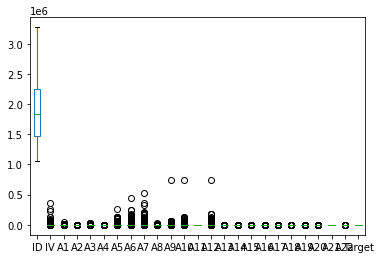

In [14]:
#checking outliers
df.plot(kind='box')

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#removing outliers
data_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

## Dataset balance

In [16]:
pd.crosstab(data_out['Target'],columns='N',normalize=True) 
#normalize true = show in %
#normalize false = show in count

col_0,N
Target,
0,0.659282
1,0.340718


In [17]:
#count of Target variable
data_out['Target'].value_counts()

0    8690
1    4491
Name: Target, dtype: int64

<AxesSubplot:ylabel='Target'>

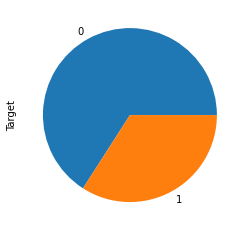

In [18]:
data_out['Target'].value_counts().plot.pie()

In [19]:
# Here we get the data as imbalanced. so using sampling for balancing.

## Under Sampling

In [20]:
#using under sampling(majority class of data points is reduced in order to balance the dataset and improve the performance of a predictive model.)
import imblearn # Imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(sampling_strategy=1)
X_res,y_res=rus.fit_resample(data_out.drop('Target', axis=1), data_out['Target'])
us= pd.concat([pd.DataFrame(y_res), pd.DataFrame(X_res)], axis=1)

In [21]:
ax=y_res.value_counts()
ax

0    4491
1    4491
Name: Target, dtype: int64

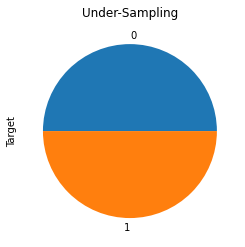

In [22]:
#visualizing 
ax=y_res.value_counts().plot.pie(title='Under-Sampling')

In [23]:
pd.crosstab(us['Target'],columns='N',normalize=True)

col_0,N
Target,
0,0.5
1,0.5


In [24]:
# Now the data is balanced

## Removing irrelavent featues

In [25]:
#we saw that very value of A11 is same. so we can remove it.
#Also we don't need ID
us=us.drop(['ID','A11'],axis=1)

## Data partition

In [26]:
## Using sklearn split 70% of our data into training set and rest in test set.
from sklearn.model_selection import train_test_split
X = us.drop('Target',axis=1)
y = us[["Target"]]
#random_state is the seed used by the random number generator. It can be any integer.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =1) 


In [27]:
# it shows the mean of each variable w.r.t the target values
df.groupby('Target').mean()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22
Target,,,,,,,,,,,,,,,,,,,,,
0,2.091859e+06,341.783322,41.975552,7.847921,31.486123,0.302158,149.328215,289.028189,418.388638,39.979642,...,0.000522,0.868801,-7.044145,-6.636992,0.227815,0.000131,0.120237,0.964373,17.049755,0.000305
1,1.751807e+06,21.432746,24.219782,6.352172,4.338617,4.531391,157.314354,244.678916,325.939520,29.364474,...,0.004516,3.527849,-3.094070,-2.787339,0.169663,0.000708,0.155760,0.958293,17.049970,0.000000


### Important features

In [28]:
#Applying Mutual info classifier to get Important Features
from sklearn.feature_selection import mutual_info_classif
# measure of how much information the presence of one variable gives about the other variable. 
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

array([0.16685977, 0.00521546, 0.02386478, 0.        , 0.00443298,
       0.23054101, 0.23573157, 0.22942082, 0.12640386, 0.14447346,
       0.14387127, 0.12625202, 0.00143416, 0.01098904, 0.03399228,
       0.0124096 , 0.01339817, 0.        , 0.00540221, 0.        ,
       0.        , 0.        ])

In [29]:
#convert array to series
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

A6     0.235732
A5     0.230541
A7     0.229421
IV     0.166860
A9     0.144473
A10    0.143871
A8     0.126404
A12    0.126252
A15    0.033992
A2     0.023865
A17    0.013398
A16    0.012410
A14    0.010989
A19    0.005402
A1     0.005215
A4     0.004433
A13    0.001434
A3     0.000000
A18    0.000000
A20    0.000000
A21    0.000000
A22    0.000000
dtype: float64

<AxesSubplot:>

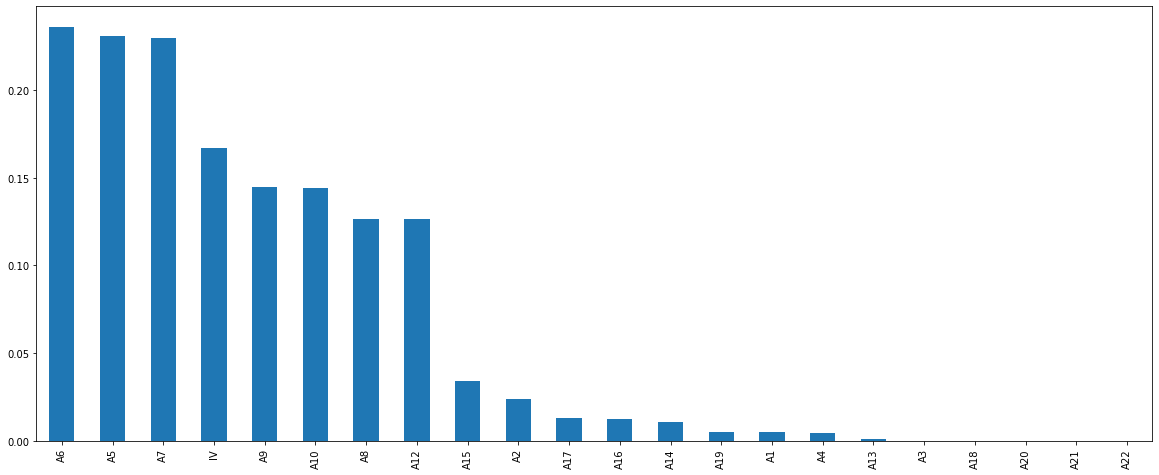

In [30]:
#visualize feature importance
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [31]:
#select how much feature we want
from sklearn.feature_selection import SelectKBest

In [32]:
#select top 10 features
sel_col=SelectKBest(mutual_info_classif,k=8)
sel_col.fit(x_train,y_train)
x_train.columns[sel_col.get_support()]

Index(['IV', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A12'], dtype='object')

In [33]:
#Selecting top 8 values and drop remaining
x_train=x_train.drop(['A1','A2','A3','A4','A13','A14','A15','A17','A18','A19','A20','A21','A22'],axis=1)

In [34]:
#Selecting top 8 values and drop remaining
x_test=x_test.drop(['A1','A2','A3','A4','A13','A14','A15','A17','A18','A19','A20','A21','A22'],axis=1)

In [35]:
from sklearn.linear_model import Ridge,RidgeClassifier
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold

In [36]:
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.827155 using {'alpha': 0.8}


In [38]:
final_mod = RidgeClassifier(alpha=8)

In [39]:
final_mod.fit(x_train, y_train)
test_pred  =final_mod.predict(x_test)
train_pred  =final_mod.predict(x_train)

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[2851  308]
 [ 773 2355]]


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[1197  135]
 [ 363 1000]]


In [42]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
t_accuracy = accuracy_score(y_train,train_pred)
t_f1 = f1_score(y_train, train_pred )
t_precision = precision_score(y_train, train_pred )
t_recall = recall_score(y_train, train_pred )
accuracy = accuracy_score(y_test,test_pred)
f1 = f1_score(y_test, test_pred )
precision = precision_score(y_test, test_pred )
recall = recall_score(y_test, test_pred )

In [43]:
print('Train')
print(' Accuracy is  :' ,t_accuracy)
print(' Precision is  :',t_precision)
print(' Recall is  :',t_recall)
print(' F1 score is :' ,t_f1)
print('test')
print(' Accuracy is  :' ,accuracy)
print(' Precision is  :',precision)
print(' Recall is  :',recall)
print(' F1 score is :' ,f1)

Train
 Accuracy is  : 0.8280578972482902
 Precision is  : 0.8843409688321442
 Recall is  : 0.7528772378516624
 F1 score is : 0.8133310309100328
test
 Accuracy is  : 0.8152133580705009
 Precision is  : 0.8810572687224669
 Recall is  : 0.7336757153338225
 F1 score is : 0.800640512409928


## Performing Logistic Regression

In [44]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
# fit the model to the training data
lr.fit(x_train,y_train)
# Predict the response for test dataset
test_pred  =lr.predict(x_test)
train_pred  =lr.predict(x_train)

### Confusion matrix for Train data

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[2732  427]
 [ 443 2685]]


### Confusion matrix for Test data

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[1175  157]
 [ 222 1141]]


Accuracy_score,f1_score,precision_score,recall_score shows how good is our model

In [47]:
# Importing accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
t_accuracy = accuracy_score(y_train,train_pred)
t_f1 = f1_score(y_train, train_pred )
t_precision = precision_score(y_train, train_pred )
t_recall = recall_score(y_train, train_pred )
accuracy = accuracy_score(y_test,test_pred)
f1 = f1_score(y_test, test_pred )
precision = precision_score(y_test, test_pred )
recall = recall_score(y_test, test_pred )

In [48]:
print('Train')
print(' Accuracy is  :' ,t_accuracy)
print(' Precision is  :',t_precision)
print(' Recall is  :',t_recall)
print(' F1 score is :' ,t_f1)
print('test')
print(' Accuracy is  :' ,accuracy)
print(' Precision is  :',precision)
print(' Recall is  :',recall)
print(' F1 score is :' ,f1)

Train
 Accuracy is  : 0.8616192142516303
 Precision is  : 0.8627892030848329
 Recall is  : 0.8583759590792839
 F1 score is : 0.860576923076923
test
 Accuracy is  : 0.859369202226345
 Precision is  : 0.8790446841294299
 Recall is  : 0.8371239911958914
 F1 score is : 0.8575723412251034


## Performing DecisionTreeClassifier

In [49]:
#Import Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
#Train the model using the training sets
dt.fit(x_train, y_train)

#Predict the response for test dataset
test_pred = dt.predict(x_test)
train_pred = dt.predict(x_train)

### Confusion matrix for Train data

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[3144   15]
 [  44 3084]]


### Confusion matrix for Test data

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[1117  215]
 [ 210 1153]]


In [52]:
t_accuracy = accuracy_score(y_train,train_pred)
t_f1 = f1_score(y_train, train_pred )
t_precision = precision_score(y_train, train_pred )
t_recall = recall_score(y_train, train_pred )
accuracy = accuracy_score(y_test,test_pred)
f1 = f1_score(y_test, test_pred )
precision = precision_score(y_test, test_pred )
recall = recall_score(y_test, test_pred )

In [53]:
print('Train')
print(' Accuracy is  :' ,t_accuracy)
print(' Precision is  :',t_precision)
print(' Recall is  :',t_recall)
print(' F1 score is :' ,t_f1)
print('test')
print(' Accuracy is  :' ,accuracy)
print(' Precision is  :',precision)
print(' Recall is  :',recall)
print(' F1 score is :' ,f1)

Train
 Accuracy is  : 0.9906155559090186
 Precision is  : 0.995159728944821
 Recall is  : 0.9859335038363172
 F1 score is : 0.9905251324875542
test
 Accuracy is  : 0.8423005565862709
 Precision is  : 0.8428362573099415
 Recall is  : 0.8459280997798972
 F1 score is : 0.8443793482240937


## Performing RandomForestClassifier

In [54]:
#import random forest. It reduces the variance by averaging the results of multiple decision trees
from sklearn.ensemble import RandomForestClassifier

# build a classifier
rf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
rf.fit(x_train, y_train)

#Predict the response for test dataset
test_pred = rf.predict(x_test)
train_pred = rf.predict(x_train)

### Confusion matrix for Train data

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[3140   19]
 [  40 3088]]


### Confusion matrix for Test data

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[1155  177]
 [ 109 1254]]


In [57]:
t_accuracy = accuracy_score(y_train,train_pred)
t_f1 = f1_score(y_train, train_pred )
t_precision = precision_score(y_train, train_pred )
t_recall = recall_score(y_train, train_pred )
accuracy = accuracy_score(y_test,test_pred)
f1 = f1_score(y_test, test_pred )
precision = precision_score(y_test, test_pred )
recall = recall_score(y_test, test_pred )

In [58]:
print('Train')
print(' Accuracy is  :' ,t_accuracy)
print(' Precision is  :',t_precision)
print(' Recall is  :',t_recall)
print(' F1 score is :' ,t_f1)
print('test')
print(' Accuracy is  :' ,accuracy)
print(' Precision is  :',precision)
print(' Recall is  :',recall)
print(' F1 score is :' ,f1)

Train
 Accuracy is  : 0.9906155559090186
 Precision is  : 0.9938847763115546
 Recall is  : 0.9872122762148338
 F1 score is : 0.9905372894947876
test
 Accuracy is  : 0.8938775510204081
 Precision is  : 0.8763102725366876
 Recall is  : 0.9200293470286134
 F1 score is : 0.8976377952755905


## performing KNearestNeighborsClassifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
test_pred = knn.predict(x_test)
train_pred = knn.predict(x_train)

### Confusion matrix for Train data

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[2809  350]
 [ 152 2976]]


### Confusion matrix for Test data

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[1105  227]
 [ 132 1231]]


In [62]:
t_accuracy = accuracy_score(y_train,train_pred)
t_f1 = f1_score(y_train, train_pred )
t_precision = precision_score(y_train, train_pred )
t_recall = recall_score(y_train, train_pred )
accuracy = accuracy_score(y_test,test_pred)
f1 = f1_score(y_test, test_pred )
precision = precision_score(y_test, test_pred )
recall = recall_score(y_test, test_pred )

In [63]:
print('Train')
print(' Accuracy is  :' ,t_accuracy)
print(' Precision is  :',t_precision)
print(' Recall is  :',t_recall)
print(' F1 score is :' ,t_f1)
print('test')
print(' Accuracy is  :' ,accuracy)
print(' Precision is  :',precision)
print(' Recall is  :',recall)
print(' F1 score is :' ,f1)

Train
 Accuracy is  : 0.9201526960394465
 Precision is  : 0.8947684906794949
 Recall is  : 0.9514066496163683
 F1 score is : 0.9222187790517509
test
 Accuracy is  : 0.8667903525046382
 Precision is  : 0.8443072702331962
 Recall is  : 0.9031548055759354
 F1 score is : 0.8727401630627437


## performing SupportVectorMachineClassifier

In [65]:

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

#predicting the Test set results
test_pred = classifier.predict(x_test)
train_pred = classifier.predict(x_train)

### Confusion matrix for Train data

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[2790  369]
 [ 486 2642]]


### Confusion matrix for Test data

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[1185  147]
 [ 238 1125]]


In [68]:
t_accuracy = accuracy_score(y_train,train_pred)
t_f1 = f1_score(y_train, train_pred )
t_precision = precision_score(y_train, train_pred )
t_recall = recall_score(y_train, train_pred )
accuracy = accuracy_score(y_test,test_pred)
f1 = f1_score(y_test, test_pred )
precision = precision_score(y_test, test_pred )
recall = recall_score(y_test, test_pred )

In [69]:
print('Train')
print(' Accuracy is  :' ,t_accuracy)
print(' Precision is  :',t_precision)
print(' Recall is  :',t_recall)
print(' F1 score is :' ,t_f1)
print('test')
print(' Accuracy is  :' ,accuracy)
print(' Precision is  :',precision)
print(' Recall is  :',recall)
print(' F1 score is :' ,f1)

Train
 Accuracy is  : 0.8640050898679815
 Precision is  : 0.8774493523746264
 Recall is  : 0.8446291560102301
 F1 score is : 0.8607265026877341
test
 Accuracy is  : 0.8571428571428571
 Precision is  : 0.8844339622641509
 Recall is  : 0.8253851797505503
 F1 score is : 0.8538899430740037


## performing NaiveBayes Classifier

In [71]:
#
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

#predicting the Test set results
test_pred = classifier.predict(x_test)
train_pred = classifier.predict(x_train)

### Confusion matrix for Train data

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[2904  255]
 [1563 1565]]


### Confusion matrix for Test data

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[1200  132]
 [ 660  703]]


In [74]:
t_accuracy = accuracy_score(y_train,train_pred)
t_f1 = f1_score(y_train, train_pred )
t_precision = precision_score(y_train, train_pred )
t_recall = recall_score(y_train, train_pred )
accuracy = accuracy_score(y_test,test_pred)
f1 = f1_score(y_test, test_pred )
precision = precision_score(y_test, test_pred )
recall = recall_score(y_test, test_pred )

In [75]:
print('Train')
print(' Accuracy is  :' ,t_accuracy)
print(' Precision is  :',t_precision)
print(' Recall is  :',t_recall)
print(' F1 score is :' ,t_f1)
print('test')
print(' Accuracy is  :' ,accuracy)
print(' Precision is  :',precision)
print(' Recall is  :',recall)
print(' F1 score is :' ,f1)

Train
 Accuracy is  : 0.7108318752982344
 Precision is  : 0.8598901098901099
 Recall is  : 0.5003196930946292
 F1 score is : 0.6325788197251415
test
 Accuracy is  : 0.7061224489795919
 Precision is  : 0.8419161676646707
 Recall is  : 0.5157740278796772
 F1 score is : 0.6396724294813467


### Random Forest classifier is better model

## Finished